In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [38]:
data_dir_training = "archive/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_training,
  validation_split=0.2,
  subset="training",
  seed=253,
  batch_size=16)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_training,
  validation_split=0.2,
  subset="validation",
  seed=253,
  batch_size=16)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [36]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [35]:
train_ds.skip(60000)
val_ds.skip(16500)

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [29]:
num_classes = len(class_names)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dense(5, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [37]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 1046, in launch_instance
      app.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-37-471bb77471a2>", line 2, in <module>
      history = model.fit(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [262144,29] and labels shape [16]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1684]

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255)

train_dataset = augment_train_data.flow_from_directory(data_dir_training,
     shuffle=True,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'del', 'nothing'],
     target_size=(224, 224),
     batch_size=16)

In [52]:
# getting pretrained model for transfer learning and defining model
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
download_model = hub.KerasLayer(url,input_shape=(224,224,3))
model = Sequential([
     download_model,
     Dense(29),
     Activation("softmax")
])
# compiling model
model.compile(optimizer=Adam(1e-3),
loss="categorical_crossentropy",
metrics=['accuracy'])
#training model
print("\n Model summary: ")
print(model.summary())
print("\n Model Training: ")
model.fit(train_dataset,
batch_size=16,
epochs=1)
# evaluating model
print("\n Model Evaluation: ")
model.evaluate(test_dataset)


 Model summary: 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_9 (Dense)             (None, 29)                29058     
                                                                 
 activation_5 (Activation)   (None, 29)                0         
                                                                 
Total params: 3569323 (13.62 MB)
Trainable params: 29058 (113.51 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
None

 Model Training: 
2719/2719 [==============================] - 1874s 688ms/step - loss: 0.8185 - accuracy: 0.7518

 Model Evaluation: 


NameError: name 'test_dataset' is not defined

In [ ]:
from PIL import Image

In [96]:
from keras.preprocessing import image

#load the model we saved
test_image = image.load_img('/Users/aaryangulia/Downloads/archive-2/Test_Alphabet/A/1e5fcac0-0494-4fcb-9dcc-a7c17403abe9.rgb_0000.png', target_size=(224, 224,3))


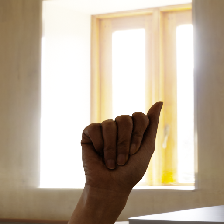

In [97]:
test_image

In [98]:
img_array = tf.keras.utils.img_to_array(test_image)/255.0
img_array = tf.expand_dims(img_array, 0)

In [99]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 49ms/step
This image most likely belongs to A with a 8.82 percent confidence.


In [2]:
# Load the existing model
model = tf.keras.models.load_model("models/english_model.h5", custom_objects={'KerasLayer': hub.KerasLayer})

# Register the KerasLayer
tf.keras.utils.get_custom_objects()['KerasLayer'] = hub.KerasLayer

# Save the model to the TensorFlow.js format
tf.saved_model.save(model, "models/saved_model")

INFO:tensorflow:Assets written to: models/saved_model/assets


INFO:tensorflow:Assets written to: models/saved_model/assets
